<a href="https://colab.research.google.com/github/xzavierlopez/03MIAR-Algoritmos-de-Optimizacion/blob/master/SEMINARIO/Seminario_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmos de optimización - Seminario**<br>

**Nombre y Apellidos**: Elvis Xavier López Yajamin   <br>

**Url**:
https://github.com/xzavierlopez/03MIAR-Algoritmos-de-Optimizacion/tree/master/SEMINARIO    

**Problema**:
>3. Combinar cifras y operaciones <br>

**Descripción del problema**: <br>

• Disponemos de las 9 cifras del 1 al 9 (excluimos el cero) y de los 4 signos básicos de las operaciones fundamentales: suma(+), resta(-), multiplicación(*) y división(/).

• Debemos **combinarlos alternativamente sin repetir ninguno de ellos** para obtener una cantidad dada. Un ejemplo sería para obtener el 4:
**4+2-6/3*1 = 4**

• Debe analizarse el problema para encontrar todos los valores enteros posibles planteando las siguientes cuestiones:
- ¿Qué valor máximo y mínimo se pueden obtener según las condiciones del problema?
- ¿Es posible encontrar todos los valores enteros posibles entre dicho mínimo y máximo ?  
> **Estas preguntas se responderán en el apartado correspondiente al diseño del algoritmo por fuerza bruta.**

• Nota: Es posible usar la función de python “eval” para evaluar una expresión.

**(*) La respuesta es obligatoria**





                                        

# **(*) ¿Cuantas posibilidades hay sin tener en cuenta las restricciones?**  

En este escenario **se permite la repetición** de números y operaciones.

- **Números (5 huecos):**  
  Cada hueco puede rellenarse con cualquiera de las 9 cifras (1–9).  
  Esto corresponde a **variaciones con repetición**, cuya fórmula es:  

  $$
  V'(n,k) = n^k
  $$

  En nuestro caso:  

  $$
  9^5 = 59{,}049
  $$

- **Operaciones (4 huecos):**  
  Cada hueco puede rellenarse con cualquiera de las 4 operaciones (+, −, x, /).  
  También son **variaciones con repetición**:  

  $$
  4^4 = 256
  $$

- **Total de expresiones sin restricciones (regla del producto):**  

  $$
  9^5 \times 4^4 = 59{,}049 \times 256 = 15{,}116{,}544
  $$

 ### **Resultado:**  

$$
\boxed{15{,}116{,}544 \;\; \text{expresiones posibles sin restricciones}}
$$

# **¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.**  

En este escenario se aplican las reglas del enunciado:  
- Se usan **5 cifras distintas** tomadas de (1,…,9), sin repetición.  
- Se usan las **4 operaciones distintas** (+, −, x, /), cada una exactamente una vez.  

- **Números (5 huecos):**  
  Hay que elegir y ordenar 5 elementos distintos de entre 9.  
  Esto corresponde a una **variación sin repetición**:  

  $$
  V(n,k) = \frac{n!}{(n-k)!}
  $$

  En nuestro caso:  

  $$
  V(9,5) = \frac{9!}{(9-5)!} = \frac{9!}{4!} = 15{,}120
  $$

- **Operaciones (4 huecos):**  
  Debemos usar las 4 operaciones distintas en los 4 huecos.  
  Esto corresponde a una **permutación de 4 elementos**:  

  $$
  P(4) = 4! = 24
  $$

- **Total de expresiones con restricciones (regla del producto):**  

  $$
  V(9,5) \times P(4) = 15{,}120 \times 24 = 362{,}880
  $$

### **Resultado:**  

$$
\boxed{362{,}880 \;\; \text{expresiones posibles con restricciones}}
$$



### **Conclusión:**  
Las restricciones reducen drásticamente el espacio de búsqueda: de más de **15 millones de expresiones posibles sin restricciones**, a solo **362 mil expresiones válidas cuando se exige no repetir números ni operaciones**.

Respuesta

# **Modelo para el espacio de soluciones**<br>
# **(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.**

El problema consiste en generar expresiones alternadas entre números y operadores, evaluarlas y almacenar únicamente los resultados enteros junto con la expresión que los produce.  

Para afrontarlo de forma eficiente en Python se proponen las siguientes estructuras:  

  ### Generación de expresiones:

  - **Recursos de partida**: Cifras (1–9) y operadores (+, −, *, /) se representarán con **listas**, ya que facilitan el recorrido y la generación de permutaciones con `itertools.permutations`.
  - **Representación**: Cada combinación completa (expresión alternada) se guardará como **tupla** de símbolos para disponer de una representación inmutable y hashable.
    - Ejemplo de tupla de expresión: `('4', '+', '2', '-', '6', '/', '3', '*', '1')`
  - **Ventaja de tuplas**: Son inmutables y hashables, por lo que pueden usarse como claves en colecciones si es necesario.

  ### Evaluación de expresiones:

  - **Conversión**: La tupla de símbolos se convierte en una **cadena** (por ejemplo: `"4+2-6/3*1"`) y se evalúa con `eval()`.
  - **Ventaja**: Esta representación es ligera y práctica, ya que aprovecha la precedencia de operadores de Python sin necesidad de programarla manualmente.

  ### Almacenamiento de resultados:

  - **Estructura**: Se usará un **diccionario** (`dict`) para registrar resultados enteros únicos y su(s) expresión(es) asociada(s):
    - **Clave**: El resultado entero.
    - **Valor**: La expresión en cadena, o una lista de expresiones si varias generan el mismo entero.
  - **Ejemplo de diccionario**:
    ```python
    resultados = {
        4:  ["4+2-6/3*1"],
        10: ["8+6-4*2/1"]
    }
  - **Ventajas**:

    - **Unicidad**: Cada entero aparece una sola vez como clave.
    - **Trazabilidad**: Se conserva qué expresión (o expresiones) lo generó.

### **Conclusión:**

- **Listas**: Para manejar dígitos y operadores y generar permutaciones.
- **Tuplas**: Para representar cada expresión alternada de forma inmutable y hashable.
- **Cadenas**: Para evaluar directamente con `eval()`.
- **Diccionarios**: Para guardar resultados enteros únicos y su(s) expresión(es), garantizando trazabilidad.

Con esta combinación se obtiene un flujo claro y eficiente: listas para generar, tuplas para representar, cadenas para evaluar y diccionarios para almacenar resultados únicos.



# **Según el modelo para el espacio de soluciones**<br>
# **(*)¿Cual es la función objetivo?**    
La función objetivo es el **resultado numérico de la expresión construida**, formada con 5 cifras distintas tomadas del 1 al 9 y las 4 operaciones básicas (+, −, *, /), colocadas de manera alternada.  

El objetivo es que este resultado coincida con una **cantidad objetivo dada** \(T\):

$$
f(\text{expresión}) = T
$$

# **(*)¿Es un problema de maximización o minimización?**   
No se trata de un problema de maximización ni de minimización, sino de **viabilidad** o **satisfacción de restricciones**, ya que el propósito es comprobar si existe alguna combinación válida de cifras y operaciones que cumpla exactamente la condición anterior.

# **Diseña un algoritmo para resolver el problema por fuerza bruta**

El algoritmo propuesto genera y evalúa **todas las combinaciones posibles** de expresiones formadas por cinco cifras distintas del 1 al 9 y los cuatro operadores básicos (`+`, `−`, `*`, `/`), cada uno usado **una sola vez** y colocados de forma **alternada**.

La función `fuerza_bruta()` se encarga de construir todas las expresiones posibles y calcular su resultado. Luego, la función `buscar_expresiones_por_valor()` permite buscar, entre esos resultados, las expresiones que coinciden **exactamente** con un valor dado.


In [1]:
from itertools import permutations           # para generar permutaciones sin repetición
from fractions import Fraction              # para evitar errores de coma flotante en divisiones
from collections import defaultdict          # para crear diccionarios con listas automáticas

def fuerza_bruta():
    """
    Genera todas las expresiones aritméticas posibles que combinan:

    - 5 cifras distintas del 1 al 9 (sin repetir).
    - 4 operadores básicos (+, −, *, /), usados una sola vez.
    - Alternancia obligatoria: cifra, operador, cifra, ..., cifra.

    Evalúa cada expresión y agrupa las que producen el mismo resultado
    en un diccionario.

    Returns:
        dict[float, list[str]]:
            Claves: resultados numéricos exactos.
            Valores: listas de expresiones que los generan.
    """

    # Cifras del 1 al 9 (sin incluir 0)
    digitos = list(range(1, 10))

    # Operadores aritméticos básicos
    operadores = ['+', '-', '*', '/']

    # Diccionario para agrupar expresiones por su resultado
    resultado_dict = defaultdict(list)

    # Generar todas las combinaciones posibles de cifras y operadores
    for cifras in permutations(digitos, 5):       # 15.120 combinaciones de cifras
        for ops in permutations(operadores):      # 24 combinaciones de operadores

            # Construir expresión alternando cifra y operador
            expresion = []
            for i in range(5):
                expresion.append(str(cifras[i]))  # añadir cifra
                if i < 4:
                    expresion.append(ops[i])      # añadir operador (solo entre cifras)

            # Convertir a cadena
            expresion_str = ''.join(expresion)

            try:
                # Evaluar la expresión de forma segura (sin builtins)
                resultado = eval(expresion_str, {"__builtins__": None}, {})

                # Convertir a float preciso usando Fraction
                resultado_preciso = float(Fraction(str(resultado)))

                # Añadir la expresión al diccionario
                resultado_dict[resultado_preciso].append(expresion_str)

            except ZeroDivisionError:
                continue
            except Exception:
                continue

    return resultado_dict

In [2]:
def buscar_expresiones_por_valor(valor_objetivo):
    """
    Busca expresiones aritméticas que generan un resultado
    exactamente igual al valor entero proporcionado.

    Las expresiones se generan mediante el algoritmo de fuerza bruta,
    combinando cinco cifras distintas del 1 al 9 y los cuatro operadores
    aritméticos básicos (+, −, *, /), usados una sola vez cada uno.

    Parámetro:
        valor_objetivo (int): Valor entero que se desea obtener como resultado.

    Retorna:
        - Lista de expresiones (como cadenas) que producen exactamente ese resultado.
        - Mensaje si no se encuentra ninguna coincidencia.

    """

    # Generar todas las expresiones posibles y sus resultados
    resultado_dict_completo = fuerza_bruta()

    # Filtrar solo los resultados que sean enteros
    resultado_dict_enteros = {
        int(k): v
        for k, v in resultado_dict_completo.items()
        if float(k).is_integer()
    }

    # Buscar el valor objetivo exacto entre los resultados enteros
    expresiones = resultado_dict_enteros.get(valor_objetivo)

    # Mostrar resultados si se encuentran expresiones
    if expresiones:
        cantidad = len(expresiones)
        print(f"Se encontraron {cantidad} expresiones que dan como resultado exacto {valor_objetivo}:")
        return expresiones

    # Mostrar mensaje si no se encontró ninguna expresión válida
    else:
        return f"No existen expresiones que den como resultado exacto {valor_objetivo}."

In [3]:
#Comprobar resultados:
buscar_expresiones_por_valor(-69)

Se encontraron 16 expresiones que dan como resultado exacto -69:


['1+4/2-8*9',
 '1+4/2-9*8',
 '1+6/3-8*9',
 '1+6/3-9*8',
 '1-8*9+4/2',
 '1-8*9+6/3',
 '1-9*8+4/2',
 '1-9*8+6/3',
 '4/2+1-8*9',
 '4/2+1-9*8',
 '4/2-8*9+1',
 '4/2-9*8+1',
 '6/3+1-8*9',
 '6/3+1-9*8',
 '6/3-8*9+1',
 '6/3-9*8+1']

## ¿Qué valor máximo y mínimo se pueden obtener según las condiciones del problema?

In [4]:
# Obtener todas las expresiones y resultados
resultado_dict = fuerza_bruta()

# Filtrar solo los resultados enteros
enteros = [int(k) for k in resultado_dict.keys() if float(k).is_integer()]

# Calcular mínimo y máximo
valor_min = min(enteros)
valor_max = max(enteros)

print(f"El valor entero mínimo es {valor_min} y el valor entero máximo es {valor_max}.")

El valor entero mínimo es -69 y el valor entero máximo es 77.


## ¿Es posible encontrar todos los valores enteros posibles entre dicho mínimo y máximo?

In [5]:
# Generar el rango completo de valores enteros esperados
rango_completo = list(range(valor_min, valor_max + 1))

# Ordenar los valores enteros encontrados
enteros = sorted(enteros)

# Comprobar si los enteros encontrados cubren todo el rango
if enteros == rango_completo:
    print("Sí, es posible encontrar todos los valores enteros entre el mínimo y el máximo.")
    print(f"Total de valores enteros encontrados: {len(enteros)}")
    print(enteros)
else:
    # Calcular qué valores faltan dentro del rango esperado
    faltantes = sorted(set(rango_completo) - set(enteros))
    print("No, no es posible encontrar todos los valores enteros entre el mínimo y el máximo.")
    print(f"Faltan los siguientes valores: {faltantes}")

Sí, es posible encontrar todos los valores enteros entre el mínimo y el máximo.
Total de valores enteros encontrados: 147
[-69, -68, -67, -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]


# **Calcula la complejidad del algoritmo por fuerza bruta**

El algoritmo completo, que incluye tanto la generación de expresiones (`fuerza_bruta()`) como la búsqueda de un valor específico (`buscar_expresiones_por_valor()`), presenta una complejidad temporal factorial: **O(n! · m!)**.

El crecimiento factorial proviene de la naturaleza exhaustiva del enfoque. A continuación, se detalla el análisis:

1. **Generación de permutaciones de cifras**:  
   El algoritmo genera todas las permutaciones posibles de cifras distintas tomadas de un conjunto de **n** dígitos. Este proceso tiene un coste factorial en función de **n**, ya que el número de permutaciones es **n!**.

2. **Generación de permutaciones de operadores**:  
   Para cada combinación de cifras, se consideran todas las permutaciones de los **m** operadores disponibles. Esto introduce un segundo coste factorial en función de **m**, dado que el número de permutaciones de operadores es **m!**.

3. **Evaluación y almacenamiento**:  
   Una vez construida cada expresión, las operaciones de evaluación y almacenamiento se realizan en tiempo constante **O(1)**, debido a los siguientes factores:  
   - La construcción de la expresión siempre implica 9 elementos (5 cifras + 4 operadores). Como este número es fijo, el coste no depende de **n** ni de **m**.  
   - La evaluación de la expresión procesa una cadena de longitud constante, por lo que el tiempo requerido es estable.  
   - El almacenamiento en el diccionario se realiza mediante inserción en una estructura hash, que tiene un coste promedio de **O(1)**.  

   Aunque estas operaciones se repitan para cada expresión, su impacto es constante y no altera el orden global de complejidad, que está dominado por la doble generación de permutaciones.

4. **Fase de búsqueda**:  
   Aunque en la fase de búsqueda solo se desee comprobar un valor concreto, es imprescindible haber generado previamente todo el espacio de expresiones. Por lo tanto, el coste computacional sigue estando gobernado por **O(n! · m!)**.

En resumen, la complejidad temporal del algoritmo está determinada por la generación exhaustiva de permutaciones, resultando en una complejidad de **O(n! · m!)**.

# **(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta.**

El algoritmo original de fuerza bruta genera todas las permutaciones posibles de 5 cifras distintas ($P(9,5)$) y de 4 operadores ($4!$), construye las expresiones completas y las evalúa una por una. Esto implica un coste factorial en el número de dígitos y operadores.

Para mejorar el algoritmo, se aplican técnicas clásicas de optimización:

### Vuelta atrás (backtracking)

- En lugar de generar todas las expresiones completas, construimos la expresión paso a paso.
- En cada paso comprobamos restricciones y descartamos ramas inviables antes de completarlas.

### Ramificación y poda (branch & bound)

- Usamos reglas de poda que reducen drásticamente el espacio explorado.
- Ejemplo: si ya no quedan operadores $\times$ o $\div$ y el resultado parcial no es entero, no podremos llegar nunca a un valor entero → se descarta esa rama inmediatamente.

### Heurísticas de ordenación (best-first search)

- Exploramos primero operadores más restrictivos ($\times$ y $\div$) y dígitos cercanos al objetivo.
- Esto no cambia la complejidad teórica, pero en promedio reduce el número de nodos visitados y acelera la búsqueda de soluciones.


In [6]:
# -------------------------------------------------------
# DESARROLO DEL ALGORITMO
# -------------------------------------------------------

# -------------------------------------------------------
# Librerías
# -------------------------------------------------------
from fractions import Fraction
import time
import pandas as pd
import io, sys
import matplotlib.pyplot as plt

# -------------------------------------------------------
# Parámetros del problema
# -------------------------------------------------------

# Cifras del 1 al 9 (sin incluir 0)
DIGITOS = list(range(1, 10))

# Operadores aritméticos básicos
OPERADORES = ['+', '-', '*', '/']

# -------------------------------------------------------
# Función
# -------------------------------------------------------

def buscar_expresiones_por_valor_opt(valor_objetivo: int):
    """
    Busca TODAS las expresiones aritméticas posibles formadas con:
        - Dígitos distintos entre 1 y 9
        - Los 4 operadores básicos (+, -, *, /), cada uno usado una sola vez
    que produzcan exactamente el número 'valor_objetivo'.

    Estrategias aplicadas:
    - Backtracking (DFS): se construye paso a paso la expresión probando todas las opciones.
    - Branch & Bound (poda): se descartan ramas que matemáticamente no pueden llevar al objetivo.
    - Heurísticas: se priorizan ciertos operadores y dígitos para intentar encontrar soluciones antes.

    Parámetro:
        valor_objetivo (int): el número entero que se quiere obtener.

    Retorna:
        - Lista de expresiones en formato string que generan el valor exacto.
        - Un mensaje si no se encuentra ninguna.
    """

    # El objetivo se maneja como fracción para evitar problemas de precisión con divisiones
    objetivo = Fraction(valor_objetivo, 1)

    # Lista donde guardaremos las expresiones que lleguen al resultado
    resultados = []

    # -------------------------------------------------------
    # Funciones auxiliares para manejar la máscara de dígitos
    # -------------------------------------------------------

    def usado(mask, idx):
        """
        Devuelve True si el dígito con índice 'idx' ya fue usado.
        Usamos una máscara de bits (bitmask) para llevar el control.
        """
        return (mask >> idx) & 1

    def set_on(mask, idx):
        """
        Marca el dígito 'idx' como usado en la máscara de bits.
        """
        return mask | (1 << idx)

    # -------------------------------------------------------
    # DFS con backtracking
    # -------------------------------------------------------

    def dfs(mask, ops_left, pasos, acum, ultimo, expr):
        """
        Recorre recursivamente el árbol de expresiones posibles.

        Parámetros:
            - mask: máscara de dígitos usados (ej: 010001010 → qué dígitos ya no puedo reutilizar)
            - ops_left: cuántos operadores quedan disponibles (diccionario con conteo)
            - pasos: cuántos operadores se han colocado hasta ahora
            - acum: acumulador de los términos ya "cerrados"
            - ultimo: término actual pendiente (se acumula con * o / hasta que llega un + o -)
            - expr: string con la expresión parcial construida

        Ejemplo:
            Si tengo "3+5*2":
                - acum = 3   (porque el + ya cerró ese término)
                - ultimo = 10 (porque 5*2 aún no se ha sumado al acumulador)
        """

        # -------------------------------
        # CASO BASE: ya usamos los 4 operadores
        # -------------------------------
        if pasos == 4:  # => se usaron 5 dígitos
            if acum + ultimo == objetivo:  # comprobamos si el resultado final coincide
                resultados.append(expr)
            return

        # -------------------------------
        # PODAS (Branch & Bound)
        # -------------------------------

        # Chequeo de consistencia:
        # siempre debe cumplirse: dígitos usados = operadores usados + 1
        usados = bin(mask).count("1")
        if usados != pasos + 1:
            return

        # Si ya no quedan multiplicaciones ni divisiones,
        # lo único que puedo hacer es sumar/restar.
        # En ese caso, si (acum+ultimo) ya es fracción (no entero),
        # nunca llegaré a un entero final → corto rama.
        if ops_left['*'] == 0 and ops_left['/'] == 0:
            if (acum + ultimo).denominator != 1:
                return

        # -------------------------------
        # EXPANSIÓN DE NODOS (probar operadores y dígitos)
        # -------------------------------

        # Ordenar operadores: primero los de mayor impacto en el valor
        # Multiplicación y división tienden a ser más restrictivos → se prueban antes
        orden_ops = sorted(
            ['+', '-', '*', '/'],
            key=lambda op: {'*': 0, '/': 1, '+': 2, '-': 3}[op]
        )

        for op in orden_ops:
            if ops_left[op] == 0:
                continue  # ese operador ya no está disponible

            # Candidatos: todos los dígitos que aún no se usaron
            libres = [(i, d) for i, d in enumerate(DIGITOS) if not usado(mask, i)]

            # Heurística: probar primero los dígitos que acercan más al objetivo
            libres.sort(key=lambda t: abs(valor_objetivo - (acum + ultimo) - t[1]))

            for idx, d in libres:
                nuevo_mask = set_on(mask, idx)  # marcamos como usado
                nd = Fraction(d, 1)  # lo tratamos como fracción

                # Actualización incremental según el operador
                if op == '+':
                    nuevo_acum, nuevo_ult = acum + ultimo, nd
                elif op == '-':
                    nuevo_acum, nuevo_ult = acum + ultimo, -nd
                elif op == '*':
                    nuevo_acum, nuevo_ult = acum, ultimo * nd
                else:  # '/'
                    if nd == 0:
                        continue  # división entre 0 no permitida
                    nuevo_acum, nuevo_ult = acum, ultimo / nd

                # Backtracking: avanzo un paso y luego deshago
                ops_left[op] -= 1
                dfs(
                    nuevo_mask,
                    ops_left,
                    pasos + 1,
                    nuevo_acum,
                    nuevo_ult,
                    f"{expr}{op}{d}"
                )
                ops_left[op] += 1  # deshacer cambio (retroceso)

    # -------------------------------------------------------
    # ETAPA INICIAL: elegir primer dígito
    # -------------------------------------------------------

    starts = list(enumerate(DIGITOS))

    # Heurística: empezar con dígitos cercanos al objetivo
    starts.sort(key=lambda t: abs(abs(valor_objetivo) - t[1]))

    for idx, d in starts:
        mask = set_on(0, idx)  # marcamos el primer dígito como usado
        ops_left = {'+': 1, '-': 1, '*': 1, '/': 1}
        dfs(
            mask,
            ops_left,
            pasos=0,
            acum=Fraction(0, 1),   # acumulador vacío
            ultimo=Fraction(d, 1), # el primer dígito se toma como "término pendiente"
            expr=str(d)
        )

    # -------------------------------------------------------
    # RESULTADOS
    # -------------------------------------------------------
    if resultados:
        print(f"Se encontraron {len(resultados)} expresiones que dan exactamente {valor_objetivo}:")
        return resultados
    else:
        return f"No existen expresiones que den como resultado exacto {valor_objetivo}."


In [8]:
#Comprobar resultados:
buscar_expresiones_por_valor_opt(-69)

Se encontraron 16 expresiones que dan exactamente -69:


['6/3+1-8*9',
 '6/3+1-9*8',
 '6/3-8*9+1',
 '6/3-9*8+1',
 '4/2+1-8*9',
 '4/2+1-9*8',
 '4/2-8*9+1',
 '4/2-9*8+1',
 '1+4/2-8*9',
 '1+4/2-9*8',
 '1+6/3-8*9',
 '1+6/3-9*8',
 '1-8*9+4/2',
 '1-8*9+6/3',
 '1-9*8+4/2',
 '1-9*8+6/3']

### Comparativa

Se ha diseñado la función `benchmark` con el objetivo de **comparar el rendimiento** entre el algoritmo de fuerza bruta y el algoritmo optimizado mediante **backtracking y poda**.  

La función aporta tres elementos clave:  
- **Tiempos medios por ejecución** (calculados a partir de varias repeticiones para mayor precisión).  
- **Speedup**, que indica cuántas veces más rápido es el algoritmo optimizado respecto al de fuerza bruta.  
- **Gráfica comparativa**, donde se visualiza la diferencia de tiempos medios entre ambos enfoques.  

**Resultados de la prueba**  
En la imagen se muestran los resultados de ejecutar el benchmark con dos valores distintos (`valor_objetivo = 55` y `valor_objetivo = 4`), cada uno con 5 repeticiones:  

- En ambos casos, el algoritmo optimizado es **aproximadamente 2.3 veces más rápido** que el de fuerza bruta.  
- La diferencia en los **tiempos medios** es consistente: la fuerza bruta tarda alrededor de **6.5 segundos** frente a **2.7–2.8 segundos** del optimizado.  
- La gráfica de barras refuerza visualmente esta mejora, mostrando claramente la reducción de tiempo al usar el enfoque optimizado.  

In [7]:

# ----------------------------------------------------------------------
# Función para facilitar comparación entre tiempos medios de ejecución
# ----------------------------------------------------------------------

def benchmark(valor_objetivo, repeticiones=5):
    """
    Compara el rendimiento entre la versión de fuerza bruta y la versión optimizada.

    Parámetros:
        valor_objetivo (int): número entero que se quiere obtener.
        repeticiones (int): número de ejecuciones para calcular tiempos promedios (por defecto 5).

    Retorna:
        DataFrame con tiempos medios y speedup.
    """

    def medir_tiempo(func, *args):
        """
        Ejecuta una función 'repeticiones' veces midiendo el tiempo total.
        Se silencia la salida estándar para evitar prints innecesarios.
        """
        old_stdout = sys.stdout
        sys.stdout = io.StringIO()  # silenciar prints
        start = time.perf_counter()
        for _ in range(repeticiones):
            func(*args)
        total = time.perf_counter() - start
        sys.stdout = old_stdout
        return round(total / repeticiones, 4)

    # ---------------------------------
    # Medir tiempos
    # ---------------------------------
    medio_fb = medir_tiempo(buscar_expresiones_por_valor, valor_objetivo)
    medio_opt = medir_tiempo(buscar_expresiones_por_valor_opt, valor_objetivo)

    # ---------------------------------
    # Guardar resultados
    # ---------------------------------
    resultados = {
        "Fuerza bruta (medio)": medio_fb,
        "Optimizado (medio)": medio_opt,
        "Speedup": round(medio_fb / medio_opt, 2)
    }

    df = pd.DataFrame([resultados])
    df.index = [f"Valor objetivo = {valor_objetivo}, repeticiones = {repeticiones}"]

    # ---------------------------------
    # Mostrar resultados
    # ---------------------------------

    display(df)   # mostrar tabla UNA sola vez

    # Gráfico de barras con los tiempos medios
    plt.figure(figsize=(6,4))
    plt.bar(["Fuerza bruta", "Optimizado"], [medio_fb, medio_opt], color=["#d9534f", "#5cb85c"])
    plt.ylabel("Tiempo medio (s)")
    plt.title(f"Benchmark (valor={valor_objetivo}, repeticiones={repeticiones})")
    plt.show()

,Fuerza bruta (medio),Optimizado (medio),Speedup
"Valor objetivo = 55, repeticiones = 5",6.511,2.7661,2.35


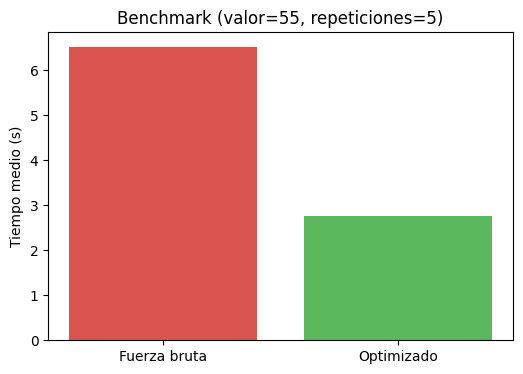

In [ ]:
# -------------------------------------------------------
# Ejecutamos el benchmark con valor_objetivo = 55
# -------------------------------------------------------
benchmark(55)

,Fuerza bruta (medio),Optimizado (medio),Speedup
"Valor objetivo = 4, repeticiones = 5",6.512,2.7441,2.37


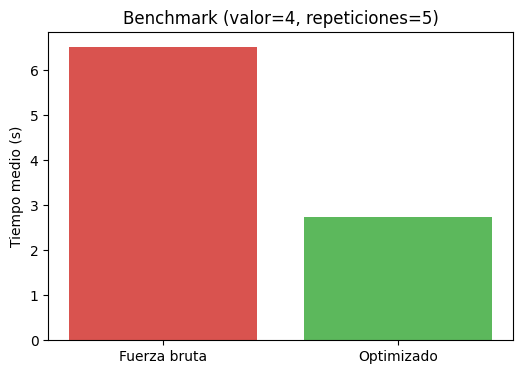

In [ ]:
# -------------------------------------------------------
# Ejecutamos el benchmark con valor_objetivo = 4
# -------------------------------------------------------
benchmark(4)

# **(*)Calcula la complejidad del algoritmo**



### Diferencia respecto a la fuerza bruta

- **Fuerza bruta**: siempre genera todas las expresiones completas, sin excepciones.  
- **Optimizado**: descarta ramas inviables mediante podas, reduciendo así el espacio explorado y evitando evaluaciones innecesarias.  


### Complejidad teórica y práctica

- **Complejidad en peor caso**: sigue siendo factorial, ya que en el escenario más desfavorable podría explorarse todo el espacio:

$$
O(n! \cdot m!)
$$

- **Complejidad en promedio**: al aplicar podas y evaluaciones incrementales, se explora solo una fracción del árbol de búsqueda. El coste real se aproxima a:

$$
O(\alpha \cdot n! \cdot m!)
$$  

con $\alpha < 1$, donde $\alpha$ representa la fracción de combinaciones realmente exploradas.  


### Justificación de la mejora

- **Impacto real**:  
  - Menos expresiones generadas gracias a la poda temprana.  
  - Menos evaluaciones, ya que no se usa `eval` sobre cadenas, sino evaluación incremental con `Fraction`.  
  - Soluciones encontradas antes al priorizar ramas más prometedoras mediante heurísticas.  


### Conclusión

Aunque la **complejidad permanece factorial** en el peor caso, el algoritmo optimizado logra una **eficiencia práctica mucho mayor** al reducir significativamente el número de combinaciones exploradas y acelerar la obtención de soluciones.  

Gracias al uso de **backtracking, poda y evaluación incremental**, se consigue una **disminución notable del tiempo de ejecución**, lo que convierte al algoritmo en una herramienta mucho más útil para resolver instancias reales en menos tiempo.


# **Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios**

En este caso no resulta necesario generar datos de entrada aleatorios, ya que el algoritmo de fuerza bruta explora de forma exhaustiva todas las combinaciones posibles de cifras y operadores. De este modo, el espacio de búsqueda queda completamente cubierto sin depender del azar.  


# **Aplica el algoritmo al juego de datos generado**

Dado lo explicado en el punto anterior, **no procede aplicar el algoritmo a un conjunto aleatorio**.  



# **Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo**


1. Universidad Internacional de Valencia (VIU). (2025). *Apuntes y recursos de la asignatura Algoritmos de Optimización*. Material docente en el aula virtual.  
2. Universidad Internacional de Valencia (VIU). (2025). *Apuntes y recursos de la asignatura Python para la Inteligencia Artificial*. Material docente en el aula virtual.  
3. YouTube. (2023). *Introduction to Big-O* [Video]. https://www.youtube.com/watch?v=zUUkiEllHG0&t=715s  

# **Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño.**

#### 1. Aumento del Tamaño del Problema
Una extensión natural es ampliar el conjunto de cifras (incluir el 0, permitir repeticiones o usar números de varias cifras) o añadir más operadores.  
Esto expande el espacio de búsqueda de manera exponencial, lo que exige técnicas más avanzadas, como **gramáticas dirigidas** para generar solo expresiones válidas o **expansión por niveles** que limite la profundidad de exploración.

#### 2. Optimización Algorítmica
Aunque la versión con backtracking ya utiliza poda y heurísticas, es posible mejorarla con:  
- **Memoización de subexpresiones**, evitando recomputaciones.  
- **Meet-in-the-middle**, dividiendo el problema en dos mitades y combinando resultados.  
- **Bitmask DP**, para representar y gestionar subconjuntos de cifras de forma eficiente.  

#### 3. Variaciones del Problema
El enfoque puede adaptarse a nuevas condiciones, como:  
- Uso de **paréntesis** o cambios en la **precedencia de operadores**.  
- Inclusión de **operadores unarios** (negación, valor absoluto, raíz).  
- **Concatenación de cifras** para formar números mayores.  
- Relajar la obligación de usar todos los operadores o permitir repeticiones.